#CS 5602 FINAL EXAMINATION

##Name: Ganesh Sapkota

##Student ID: 12584026

##Prelim 1 Class ID: 9884

##DUE 12/19/21 11:59 PM

In [111]:
pip install pycryptodome==3.4.3

In [110]:
pip install pdfplumber -q

In [112]:
import hashlib
import random
import Crypto
from Crypto.Util.number import *
import codecs
from Crypto import Random
import numpy
from fractions import Fraction
import math
import re
import textwrap
import hmac
import hashlib

#Q.N.1 MD5 Hasher


In [113]:
# Q.N.1
pdf_file = "F21CS5602FinalExam.pdf"
md5_hash = hashlib.md5()
with open(pdf_file,"rb") as f:
    # Read and update hash in chunks of 4K
    for block in iter(lambda: f.read(4096),b""):
        md5_hash.update(block)
    has_digest = md5_hash.hexdigest()
    print("MD5 Hash Digest of F21CS5602FinalExam.pdf file is:\n",has_digest)

MD5 Hash Digest of F21CS5602FinalExam.pdf file is:
 f81a7e5355b2ca1051246af51d022089


##Hash Digest of F21CS5602FinalExam.pdf file is:
 f81a7e5355b2ca1051246af51d022089

##MD5 Hash Digest of F21CS5602FinalExam.pdf file generated from Hasher from[https://www.quickhash-gui.org]

f81a7e5355b2ca1051246af51d022089


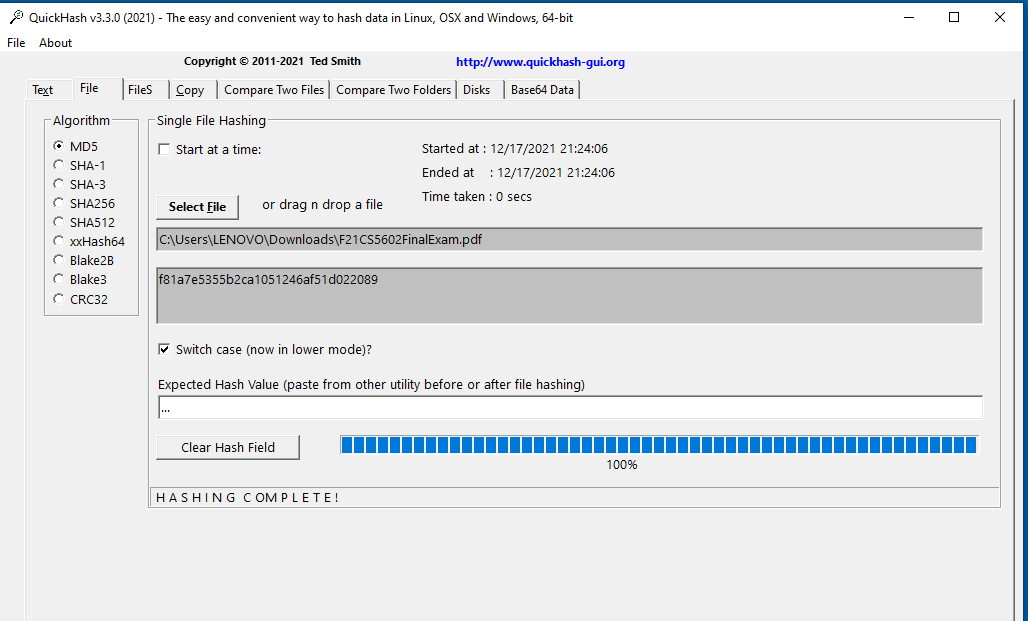

#QN 2 Cracking MD5

<b>Strategy to Crack MD5</b>

Step 1: Construct the format 28 byte key. First 8 is SID and Last 20 bytes are the combination of 0's and 1's

    my Student id is 12584026

    So,the key format will be 12584026+[20 byte combination of 0's and 1's]

Step 2: Generate the list of all possible combination of (sid + [20 byte of of 0's and 1's]). Sid is fixed but last 20 bytes which is cobination of 0's and 1's.

    Total number of keys = 2^20 = 1048576

    So, we need to generate total 1048576 number of keys. 

step 3: For each keys we find the hexadecimal hash-digest and compare it with given has-digest in the question.

    Among all 1048576 keys, only one of them will be the real key to give the hexa decimal digest of given phrase.

    my class id from prelim 1 is "9884" and the corrosponding has digest is "a93c4bb787b6ac0e2ca522e419af91f3"

    For each keys:
      calculate hexadecimal hash_digest

      if (hash_digest == "a93c4bb787b6ac0e2ca522e419af91f3")
        print( hash-digest)
        print(key)
      
Step 4: Separate first 8 byte Student id from key and print Prelim 1 class id and last 20 byte of key.

Thus key is identified Md5 is cracked.


<b>Conclusion:</b>

So, Here we apply Brute force approach to compare given hash digest with  all possible hash digests generated using all possible combination of keys.

##convert integer to binary

In [114]:
# Python3 program to convert a
# decimal number to binary number

# function to convert
# decimal to binary
def decToBinary(n):
	
	# array to store
	# binary number
	binaryNum = [0] * n;

	# counter for binary array
	i = 0;
	while (n > 0):

		# storing remainder
		# in binary array
		binaryNum[i] = n % 2;
		n = int(n / 2);
		i += 1;

	# printing binary array
	# in reverse order
	for j in range(i - 1, -1, -1):
		print(binaryNum[j], end = "");



In [6]:
#convert sid to binary
n = 12584026
decToBinary(n)

# print(len(str(b)))
# This code is contributed by mits

110000000000010001011010

Binary Conversion of my Student Id: 110000000000010001011010


##convert binary to byte array

In [115]:
def bitstring_to_bytes(s):
    v = int(s, 2)
    b = bytearray()
    while v:
        b.append(v & 0xff)
        v >>= 8
    return bytes(b[::-1])

In [116]:
#test Convert binary to bytearray
sid = '11000000000001000101101'
bits_20 = '01101000011010011101'
key = sid + bits_20
bitstring_to_bytes(key)

b'\x06\x00"\xd6\x86\x9d'

##Convert byte string to bianry bit string

In [117]:
def gen_bits(bytes):
  #:byte is a string of bytes
  bits = []
  for b in bytes:
    bits.append((bin(ord(b))))
  return ''.join(bits)

In [118]:
n = '12584026' 
bs = gen_bits(n)
print("64 bit bit stting of my sid\n",bs)


64 bit bit stting of my sid
 0b1100010b1100100b1101010b1110000b1101000b1100000b1100100b110110


Key will be formatted into byte array

##Step 2: Generate the list of all possible combination of keys

##Generate all combination of n bytes 

---



In [119]:
import itertools
def kbits(n, k):
    result = []
    for bits in itertools.combinations(range(n), k):
        s = ['0'] * n
        for bit in bits:
          s[bit] = '1'
          result.append(''.join(s))
    return result

In [12]:
# test kbits(n,k)
n = 5
for k in range(1,n):
  print(kbits(n,k))

['10000', '01000', '00100', '00010', '00001']
['10000', '11000', '10000', '10100', '10000', '10010', '10000', '10001', '01000', '01100', '01000', '01010', '01000', '01001', '00100', '00110', '00100', '00101', '00010', '00011']
['10000', '11000', '11100', '10000', '11000', '11010', '10000', '11000', '11001', '10000', '10100', '10110', '10000', '10100', '10101', '10000', '10010', '10011', '01000', '01100', '01110', '01000', '01100', '01101', '01000', '01010', '01011', '00100', '00110', '00111']
['10000', '11000', '11100', '11110', '10000', '11000', '11100', '11101', '10000', '11000', '11010', '11011', '10000', '10100', '10110', '10111', '01000', '01100', '01110', '01111']


In [120]:
def get_all_keys(n,bsid):
  #:n = number of bytes 
  #:bsid = binary byte string of student id
  all_keys = []
  # n = 20
  for i in range(0,n+1):
    b = kbits(n, i)
    # bits = gen_bits(b)
    for k in range(0,len(b)):
      all_keys.append(str(bsid)+str(b[k]))
    # print(kbits(n, i))
  # print(all)
  return all_keys

Above function generates all possible combination of keys of 28  bytes(ie. 8 bytes sid + 20 bytes 0's and 1's)

In [121]:
#test get_all_keys(n,bsid)
# returns all the combinations of n bytes
# bsid = sid in binary
n = 20
# bsid = '01100010110010011010101110000110100011000001100100110110'
bsid = '11000000000001000101101'
# bsid = '12584026'
# decToBinary(sid)
all_keys = get_all_keys(n,bsid)
print(len(all_keys))
print(all_keys[:100])

TypeError: ignored

In [122]:
# convert binary keys to bytearray keys
def get_bytearray_keys(all):
  #:all = list of all possible keys in binary
  bytearray_keys = []
  for i in all:
    bytearray_keys.append(bitstring_to_bytes(i))
  return bytearray_keys

In [126]:
#test get_bytearray_keys(all):
# all = get_all_keys(20,bsid)
keys = get_bytearray_keys(all_keys)
print("Number of Keys are:",len(keys))

Number of Keys are: 10485760


##Step 3: 

##Compute hash-digest of message with keys

In [127]:
import hmac
def generate_md5_hash(key,msg):
  hash = hmac.new(key, msg.encode("utf-8"), digestmod='md5')
  # hash = hmac.new(hash_key, 'this is the text to be hashed', md5)
  # digest = hash.digest()
  digest = hash.hexdigest()
  # print(digest)
  return digest

In [18]:
# #test generate_md5_hash(key,msg):
# key = b'\x06\x00"\xd6\x86\x9d'  #hexadecimal key
# msg='The King of France is planning to attack tomorrow.'
# a = generate_md5_hash(key,msg)
# # b = generate_md5_hash(key,msg)
# # if (a == b):
# print(a)

In [19]:
# key = "0b1100010b1100100b1101010b1110000b1101000b1100000b1100100b110110"
# ba = bitstring_to_bytes(key)
# msg='The King of France is planning to attack tomorrow.'
# generate_md5_hash(ba,msg)

##Crack MD5 and Get Key Used to hash

In [128]:
#crack MD5
def crack_MD5(keys,given_hash,msg):
  for key in keys:
    hex_hash = generate_md5_hash(key,msg)
    if(hex_hash == given_hash):
      return key
      break
      # print(1)

In [129]:
#test MD5 Crash
given_hash = "a93c4bb787b6ac0e2ca522e419af91f3"
msg = "The King of France is planning to attack tomorrow."
key = crack_MD5(keys,given_hash,msg)
print(key)

None


I implemented all the steps but couldnt find matching hash digest and key associate with it. i think the format of key i used to generate the hash digest is not the appropriate one. i was really confused about the format of the key so i ask it in email and also in the last office hours but i still could't crack the MD5.


#Q.N 3 Mini Enigma








###Rotors

In [130]:
alph = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
# Each rotor disk is represented as a permutation of A..Z
rotorDisks = """EKMFLGDQVZNTOWYHXUSPAIBRCJ
AJDKSIRUXBLHWTMCQGZNPYFVOE
BDFHJLCPRTXVZNYEIWGAKMUSQO
VZBRGITYUPSDNHLXAWMJQOFECK""".split('\n')
rotorDisks

['EKMFLGDQVZNTOWYHXUSPAIBRCJ',
 'AJDKSIRUXBLHWTMCQGZNPYFVOE',
 'BDFHJLCPRTXVZNYEIWGAKMUSQO',
 'VZBRGITYUPSDNHLXAWMJQOFECK']

For mini Enigma we have 4 rotors but we chose any 2 rotors from 4 for reduced complexity of enigma operations.

###Reflectors

In [131]:
reflectors = """YRUHQSLDPXNGOKMIEBFZCWVJAT
FVPJIAOYEDRZXWGCTKUQSBNMHL""".split('\n')
reflectors

['YRUHQSLDPXNGOKMIEBFZCWVJAT', 'FVPJIAOYEDRZXWGCTKUQSBNMHL']

We have 1 reflector to chose from two given for mini Enigma

###Mini enigma Encryption

In [132]:
def mEnigma(text,disk1num,shift1,disk2num,shift2,reflectornum):
  # To encrypt something we need to select two out of four disks, pick a shift for each disk, as well as a reflector.
  # We then run the message through the shifted disks in the forward direction in order, then through the reflector
  # and then back through the disks in the reverse direction. After each letter, disk1 is shifted by 1. For every 26
  # letters disk2 is shifted by 1.
  global alph, rotorDisks,reflectors
  text = text.upper() # Make sure we are working with capital letters
  disk1 = rotorDisks[disk1num]
  disk2 = rotorDisks[disk2num]
  reflector = reflectors[reflectornum]
  ostr = ''
  for c in text:
    c = rDisk(c,disk1,shift1,0)
    c = rDisk(c,disk2,shift2,0)
    c = refl(c,reflector)
    c = rDisk(c,disk2,shift2,1)
    ostr += rDisk(c,disk1,shift1,1)
    shift1 += 1
    if shift1 == 26: # disk2 shifts every 26 disk1 shifts
      shift2 += 1
      shift2 = shift2%26
    shift1 = shift1%26
  return ostr

In [133]:
def refl(inChar,reflector):
  # inChar is the input character, reflector is one of the two reflectors
  # outChar is the output character
  global alph
  inChar= inChar.upper() # make sure we work with capital letters
  return reflector[alph.index(inChar)] # Applying the permutation to inChar
  # return alph.index(inChar) # Applying the permutation to inChar

In [134]:
inChar = 'o'
reflector = reflectors[1]
print(reflector[14])
# refl(inChar,reflector)

G


In [135]:
def rDisk(inChar,disk,shift,direction):
  # inChar is the input character, disk is one of the four rotorDisks, shift is how much the disk is shifted.For example,
  # let's use disk 1 as our target disk. If the shift is 0, A goes to E, B goes to K, etc. We assume that shifts are
  # shifts to the right, shift = 1 EKMFLGDQVZNTOWYHXUSPAIBRCJ becomes JEKMFLGDQVZNTOWYHXUSPAIBRC and
  # for shift 2 it becomes CJEKMFLGDQVZNTOWYHXUSPAIBR, etc.
  # Enigma used the rotors in two directions. In the forward direction, which we denoteby 0, it used the permutation
  # like the reflectors did. In the reverse direction, which we denote by 1, it used the inverse permutation.
  global alph
  inChar= inChar.upper() # make sure we work with capital letters
  shift = shift%26 # make sure that shifts are proper
  perm = disk[-shift:]+disk[:-shift]
  invperm = ""
  for c in alph:
    invperm += alph[perm.index(c)]
  if direction == 0:
    return perm[alph.index(inChar)] # Applying the permutation to inChar
  else:
    return invperm[alph.index(inChar)]# Applying the inversepermutation

In [136]:
# test mini enigma
text = 'gtfzrt'
disk1num = 1
shift1 = 26
disk2num = 2
shift2 = 26
reflectornum = 1
mEnigma(text,disk1num,shift1,disk2num,shift2,reflectornum)

'TFZRTB'

##a) Group Theoretical Model

The Theoretical Encryption Model of operation of Mini Enigma can be represented as:

  $E = D_{1}.D_{2}.R.D{2}^{-1}.D_{-1}^{-1}$
  
  where D1 is disk 1 D2 is disk 2 and R is the reflector.

  In case of Mini-Enigma, we take 2 disks and one Reflector for reduced complexity of encryption operation. Each character passer through disk 1 and disk 2 then reflector and come back to d2 and d1 again. Unlike in Real Enigma, Plug board implementation is Misssing

Each time key is pressed, disk rotates changing its transformation(permutation)
. Disk 1 changes its permutation for each key stroke while disk 2 changes its permutation for every 26 key strokes. that When d1 Make.s its complete rotation 
d2 makes its first transformation

if shift of disk 1 is 'n' and shift of disk 2 is 'm' then it can be represented as: 

$p^{n}D_{1}p^{-n}$

$p^{m}D_{2}p^{-m}$

where p is the cyclic permutation Mapping. When letter goes through forward direction (say 0 in our case), we consider it as forward permutation and when character comes back from reflector and goes to the disks in backward direction(say 1) again we consider it as the inverse permutation.


So taking this in consideration we can also represent the group model above as:

$E = p^{n}D_{1}p^{-n}.p^{m}D_{2}p^{-m}.R.p^{m}D_{2}^{-1}p^{-m}.p^{n}D_{1}^{-1}p^{-n}$

##b)Self-Decryption
Like in Real enigma, Mini Enigma itself decrypts the cipher that it had encrypted for same set of Enigma Configuration. ie (d1,s1,d2,s2,r).

That is:

 if ct = mEnigma(pt,d1,s1,d2,s2,r) then pt = (ct,d1,s1,d2,s2,r) always holds.

In real enigma, the Reflector has property that its permutation which makes loop pairing of alphabet [A-Z] is always fixed. It doesnot changes each time like in disks. On the disks, each letter can be paired with any other letter which changes every time with disk rotation. A letter 'C' could be paired to 'K', while the 'K' is wired to 'P'. But in the reflector, the connections are made in loop pairs which is always fixed. for instance, 'C' is wired to the 'K' which means that the 'K' is also paired to the 'C', which results in a reciprocal encryption

Beacause of this property of Reflector which exixts in Enigma Machine that is also retained in mini enigma, Makes the Mini enigma Self Decrypting.



As long as the reflector has this property no matter what ths number of disks are, the system is always able to do the reciprocal encryption according to below mathematical model. This model of enigma also depits that the path followed by the current in enigma machine for a same set of enigma configuration is always the same thus conforms the reciprocal encryption.

$E = p^{n}D_{1}p^{-n}.p^{m}D_{2}p^{-m}.R.p^{m}D_{2}^{-1}p^{-m}.p^{n}D_{1}^{-1}p^{-n}$







##c) No Fixed Points

The mini Enigma reflector imitates the property of Real enigma reflector that do not allow the flow of current back to its incoming path as there are 13 pair of loop connection in reflector. Since The flow of current to backward direction from reflector is impossible in enigma, it confirms that it can never encrypts to itself.

<b>In Mini enigma reflector also there is fixed permutation of reflector string and 13 unique loop pairings in which a letter never maps with itself</b>. This confirms the similar property of reflector in real enigma mentioned above.

SO regardles the number of Disks and their configurations in mini Enigma, this property of reflector ensures that a letter never encrypts to itself.

Thi property of reflector remains same for any number of rotors.



##d) Cracking Mini Enigma
As we know that Mini Enigma is self decrypting, it can do a reverse encryption a character using same set of Configuration.

In order to crack mini enigma, we first need to determine the configuration of Mini enigma used to encrypt the cipher text. EnigmaCID.txt has 10,000 characters which are in the encrypted in from with a paticular enigma setting. But We don't know what the setting is. if we could figure out the enigma setting for any one of the character then same setting could be applied for other characters also to decrypt them.

 So, i used following steps:

<b>Step 1:</b> Generate the list of all possible enigma setting for a cipher text to convert it into the plain text:
 
  it means for a single cipher text ct there are N possible plain text which has N corrosponding enigma settings.
  for our Mini enigma, we have 4 possible disk1 to choose from, 26 possible shift1 to make, 4 possible disk2 to choose from and 26 possible shifts 2 to make
and 2 possible direction

 So, total number of possible settings  N = 4*3*26*26*2 = 16224 which generates same number of plain texts.

<b>Step 2:</b>Iterate over all N settings and generate the cipher text for corrosponding plain text. 

<b>Step 3:</b> if the generated cipher text matched with the cipher text we have taken
 then return the corrosponding setting. This setting is the one used to encrypt the original plain text.

<b>Step 4:</b> Use the setting obtained in step 3 to decrypt all the cipher text in EnigmaCID.txt file  






####Step 1

In [137]:
# convert cipher text to all possible plaintext 
# applying all possible combination of enigma setting
def ct2pt(ct):
  #:ct is given cipher text character
  # pt = {}
  pt = []
  for d1 in range(0,4):
    for s1 in range(1,27):
      for d2 in range(0,4):
        for s2 in range(1,27):
          for r in range(0,2):
            # c +=1 
            # print("Enigma Setting:",(d1,s1,d2,s2,r))
            p = mEnigma(ct,d1,s1,d2,s2,r)
            s = [p,d1,s1,d2,s2,r]
            # print(s)
            # pt[p].append(s)
            pt.append(s)
            # if (pt == ct):
            #   print(d1,s1,d2,s2,r)
            #   break
            # else:
            #   print("empty")
  # print(pt)
  return pt

Above function generates all possible plain text and the corrosponding configurations/settings of Mini enigma for a one cipher text. It returns a list of list of plain text and settings. 

In [138]:
# test ct2pt(ct):
ct = "O"
mEnigma(ct,1,2,2,3,1)
ct2pt(ct)[:10]

[['S', 0, 1, 0, 1, 0],
 ['X', 0, 1, 0, 1, 1],
 ['I', 0, 1, 0, 2, 0],
 ['E', 0, 1, 0, 2, 1],
 ['P', 0, 1, 0, 3, 0],
 ['X', 0, 1, 0, 3, 1],
 ['Q', 0, 1, 0, 4, 0],
 ['J', 0, 1, 0, 4, 1],
 ['H', 0, 1, 0, 5, 0],
 ['R', 0, 1, 0, 5, 1]]

####Step 2 and Step 3

In [139]:
#first character fro EnigmaCID.txt
ct = "O"
pt = ct2pt(ct)

for items in pt:
  p = items[0]
  d1 =items[1]
  s1 =items[2]
  d2 =items[3]
  s2 =items[4]
  r =items[5]
  ct1 = mEnigma(ct,d1,s1,d2,s2,r)
  if(ct == ct1):
    print("cracked")
    break


Above Program check if given cipher text matched with cipher text generated using different settings

Here i implemented all the steps but couldn't get the matching configuration. That is why i couldnt perform the step 4 to decrypt the text file Enigma9884.txt and couldn't generate SapkotaEnigma.txt



#Q.N 4 DES

##a) Initial *Permutation*

In [140]:
def perm_to_cycles(perm):
  #input param: perm is a permutation of n natural numbers as a list data.
  #create dictionary of permutation
  pdict = {i+1: perm[i] for i in range(len(perm))}
  cycles = []

  while pdict:
    #starting element
    s0 = next(iter(pdict)) 
    current_elem = pdict[s0]
    next_item = pdict[current_elem]

    cycle = []
    while True:
      cycle.append(current_elem)
      del pdict[current_elem]
      current_elem = next_item
      if next_item in pdict:
          next_item = pdict[next_item]
      else:
          break

    cycles.append(cycle)

  return cycles

Above function generates the ccycle of Permutation. Code is reused from Homework 3.

In [141]:
#Initial Permutation Table
initial_perm = [58, 50, 42, 34, 26, 18, 10, 2,
				60, 52, 44, 36, 28, 20, 12, 4,
				62, 54, 46, 38, 30, 22, 14, 6,
				64, 56, 48, 40, 32, 24, 16, 8,
				57, 49, 41, 33, 25, 17, 9, 1,
				59, 51, 43, 35, 27, 19, 11, 3,
				61, 53, 45, 37, 29, 21, 13, 5,
				63, 55, 47, 39, 31, 23, 15, 7]
print("Cycle Structures of initial permutation:\n")
perm_to_cycles(initial_perm)

Cycle Structures of initial permutation:



[[58, 55, 13, 28, 40, 1],
 [50, 53, 29, 32, 8, 2],
 [42, 51, 45, 27, 48, 3],
 [34, 49, 61, 31, 16, 4],
 [26, 56, 5],
 [18, 54, 21, 30, 24, 6],
 [10, 52, 37, 25, 64, 7],
 [60, 39, 9],
 [44, 35, 41, 59, 47, 11],
 [36, 33, 57, 63, 15, 12],
 [20, 38, 17, 62, 23, 14],
 [46, 19],
 [22],
 [43]]

##b) Custom DES




##Declaration of different permutation tables


In [142]:
#Expansion D-box Table
exp_d = [32, 1 , 2 , 3 , 4 , 5 , 4 , 5,
		      6 , 7 , 8 , 9 , 8 , 9 , 10, 11,
		    12, 13, 12, 13, 14, 15, 16, 17,
		    16, 17, 18, 19, 20, 21, 20, 21,
		    22, 23, 24, 25, 24, 25, 26, 27,
		    28, 29, 28, 29, 30, 31, 32, 1 ]

#Straight Permutation Table
per = [ 16, 7, 20, 21,
		    29, 12, 28, 17,
		    1, 15, 23, 26,
		    5, 18, 31, 10,
		    2, 8, 24, 14,
		    32, 27, 3, 9,
		    19, 13, 30, 6,
		    22, 11, 4, 25 ]

# Original S-box Table from s=1 to s=8
# sbox = [s = 8 [ [13, 2, 8, 4, 6, 15, 11, 1, 10, 9, 3, 14, 5, 0, 12, 7],
# 			[1, 15, 13, 8, 10, 3, 7, 4, 12, 5, 6, 11, 0, 14, 9, 2],
# 			[7, 11, 4, 1, 9, 12, 14, 2, 0, 6, 10, 13, 15, 3, 5, 8],
# 			[2, 1, 14, 7, 4, 10, 8, 13, 15, 12, 9, 0, 3, 5, 6, 11] ],

#       s = 6[ [12, 1, 10, 15, 9, 2, 6, 8, 0, 13, 3, 4, 14, 7, 5, 11],
# 		[10, 15, 4, 2, 7, 12, 9, 5, 6, 1, 13, 14, 0, 11, 3, 8],
# 			[9, 14, 15, 5, 2, 8, 12, 3, 7, 0, 4, 10, 1, 13, 11, 6],
# 			[4, 3, 2, 12, 9, 5, 15, 10, 11, 14, 1, 7, 6, 0, 8, 13] ],
        
#       s= 1 [[14, 4, 13, 1, 2, 15, 11, 8, 3, 10, 6, 12, 5, 9, 0, 7],
# 		[ 0, 15, 7, 4, 14, 2, 13, 1, 10, 6, 12, 11, 9, 5, 3, 8],
# 		[ 4, 1, 14, 8, 13, 6, 2, 11, 15, 12, 9, 7, 3, 10, 5, 0],
# 		[15, 12, 8, 2, 4, 9, 1, 7, 5, 11, 3, 14, 10, 0, 6, 13 ]],
			
# 		s = 2[[15, 1, 8, 14, 6, 11, 3, 4, 9, 7, 2, 13, 12, 0, 5, 10],
# 			[3, 13, 4, 7, 15, 2, 8, 14, 12, 0, 1, 10, 6, 9, 11, 5],
# 			[0, 14, 7, 11, 10, 4, 13, 1, 5, 8, 12, 6, 9, 3, 2, 15],
# 		[13, 8, 10, 1, 3, 15, 4, 2, 11, 6, 7, 12, 0, 5, 14, 9 ]],

#     s = 7[ [4, 11, 2, 14, 15, 0, 8, 13, 3, 12, 9, 7, 5, 10, 6, 1],
# 		[13, 0, 11, 7, 4, 9, 1, 10, 14, 3, 5, 12, 2, 15, 8, 6],
# 			[1, 4, 11, 13, 12, 3, 7, 14, 10, 15, 6, 8, 0, 5, 9, 2],
# 			[6, 11, 13, 8, 1, 4, 10, 7, 9, 5, 0, 15, 14, 2, 3, 12] ],

#     s = 4[[7, 13, 14, 3, 0, 6, 9, 10, 1, 2, 8, 5, 11, 12, 4, 15],
# 		[13, 8, 11, 5, 6, 15, 0, 3, 4, 7, 2, 12, 1, 10, 14, 9],
# 		[10, 6, 9, 0, 12, 11, 7, 13, 15, 1, 3, 14, 5, 2, 8, 4],
# 			[3, 15, 0, 6, 10, 1, 13, 8, 9, 4, 5, 11, 12, 7, 2, 14] ],

#     s = 5[ [2, 12, 4, 1, 7, 10, 11, 6, 8, 5, 3, 15, 13, 0, 14, 9],
# 		[14, 11, 2, 12, 4, 7, 13, 1, 5, 0, 15, 10, 3, 9, 8, 6],
# 			[4, 2, 1, 11, 10, 13, 7, 8, 15, 9, 12, 5, 6, 3, 0, 14],
# 		[11, 8, 12, 7, 1, 14, 2, 13, 6, 15, 0, 9, 10, 4, 5, 3 ]],

# 		s = 3[[10, 0, 9, 14, 6, 3, 15, 5, 1, 13, 12, 7, 11, 4, 2, 8],
# 		[13, 7, 0, 9, 3, 4, 6, 10, 2, 8, 5, 14, 12, 11, 15, 1],
# 		[13, 6, 4, 9, 8, 15, 3, 0, 11, 1, 2, 12, 5, 10, 14, 7],
# 			[1, 10, 13, 0, 6, 9, 8, 7, 4, 15, 14, 3, 11, 5, 2, 12 ]]]

# Modified S-Box location according to the permutation order of my class id
 
sbox_custom = [[[13, 2, 8, 4, 6, 15, 11, 1, 10, 9, 3, 14, 5, 0, 12, 7],
			[1, 15, 13, 8, 10, 3, 7, 4, 12, 5, 6, 11, 0, 14, 9, 2],
			[7, 11, 4, 1, 9, 12, 14, 2, 0, 6, 10, 13, 15, 3, 5, 8],
			[2, 1, 14, 7, 4, 10, 8, 13, 15, 12, 9, 0, 3, 5, 6, 11]],
      
      [[12, 1, 10, 15, 9, 2, 6, 8, 0, 13, 3, 4, 14, 7, 5, 11],
		[10, 15, 4, 2, 7, 12, 9, 5, 6, 1, 13, 14, 0, 11, 3, 8],
			[9, 14, 15, 5, 2, 8, 12, 3, 7, 0, 4, 10, 1, 13, 11, 6],
			[4, 3, 2, 12, 9, 5, 15, 10, 11, 14, 1, 7, 6, 0, 8, 13]],
        
      [[14, 4, 13, 1, 2, 15, 11, 8, 3, 10, 6, 12, 5, 9, 0, 7],
		[ 0, 15, 7, 4, 14, 2, 13, 1, 10, 6, 12, 11, 9, 5, 3, 8],
		[ 4, 1, 14, 8, 13, 6, 2, 11, 15, 12, 9, 7, 3, 10, 5, 0],
		[15, 12, 8, 2, 4, 9, 1, 7, 5, 11, 3, 14, 10, 0, 6, 13 ]],
			
		[[15, 1, 8, 14, 6, 11, 3, 4, 9, 7, 2, 13, 12, 0, 5, 10],
			[3, 13, 4, 7, 15, 2, 8, 14, 12, 0, 1, 10, 6, 9, 11, 5],
			[0, 14, 7, 11, 10, 4, 13, 1, 5, 8, 12, 6, 9, 3, 2, 15],
		[13, 8, 10, 1, 3, 15, 4, 2, 11, 6, 7, 12, 0, 5, 14, 9 ]],

    [ [4, 11, 2, 14, 15, 0, 8, 13, 3, 12, 9, 7, 5, 10, 6, 1],
		[13, 0, 11, 7, 4, 9, 1, 10, 14, 3, 5, 12, 2, 15, 8, 6],
			[1, 4, 11, 13, 12, 3, 7, 14, 10, 15, 6, 8, 0, 5, 9, 2],
			[6, 11, 13, 8, 1, 4, 10, 7, 9, 5, 0, 15, 14, 2, 3, 12]],

    [[7, 13, 14, 3, 0, 6, 9, 10, 1, 2, 8, 5, 11, 12, 4, 15],
		[13, 8, 11, 5, 6, 15, 0, 3, 4, 7, 2, 12, 1, 10, 14, 9],
		[10, 6, 9, 0, 12, 11, 7, 13, 15, 1, 3, 14, 5, 2, 8, 4],
			[3, 15, 0, 6, 10, 1, 13, 8, 9, 4, 5, 11, 12, 7, 2, 14]],

    [[2, 12, 4, 1, 7, 10, 11, 6, 8, 5, 3, 15, 13, 0, 14, 9],
		[14, 11, 2, 12, 4, 7, 13, 1, 5, 0, 15, 10, 3, 9, 8, 6],
			[4, 2, 1, 11, 10, 13, 7, 8, 15, 9, 12, 5, 6, 3, 0, 14],
		[11, 8, 12, 7, 1, 14, 2, 13, 6, 15, 0, 9, 10, 4, 5, 3 ]],

		[[10, 0, 9, 14, 6, 3, 15, 5, 1, 13, 12, 7, 11, 4, 2, 8],
		[13, 7, 0, 9, 3, 4, 6, 10, 2, 8, 5, 14, 12, 11, 15, 1],
		[13, 6, 4, 9, 8, 15, 3, 0, 11, 1, 2, 12, 5, 10, 14, 7],
			[1, 10, 13, 0, 6, 9, 8, 7, 4, 15, 14, 3, 11, 5, 2, 12 ]]]

# Final Permutation Table
final_perm = [ 40, 8, 48, 16, 56, 24, 64, 32,
			39, 7, 47, 15, 55, 23, 63, 31,
			38, 6, 46, 14, 54, 22, 62, 30,
			37, 5, 45, 13, 53, 21, 61, 29,
			36, 4, 44, 12, 52, 20, 60, 28,
			35, 3, 43, 11, 51, 19, 59, 27,
			34, 2, 42, 10, 50, 18, 58, 26,
			33, 1, 41, 9, 49, 17, 57, 25 ]

##Utility functions for DES

###Binary to Hexadecimal to Binary conversion

> Indented block



In [143]:
# Convert Binary to hexadecimal
def bin2hex(s):
	mp = {"0000" : '0',
		"0001" : '1',
		"0010" : '2',
		"0011" : '3',
		"0100" : '4',
		"0101" : '5',
		"0110" : '6',
		"0111" : '7',
		"1000" : '8',
		"1001" : '9',
		"1010" : 'A',
		"1011" : 'B',
		"1100" : 'C',
		"1101" : 'D',
		"1110" : 'E',
		"1111" : 'F' }
	hex = ""
	for i in range(0,len(s),4):
		ch = ""
		ch = ch + s[i]
		ch = ch + s[i + 1]
		ch = ch + s[i + 2]
		ch = ch + s[i + 3]
		hex = hex + mp[ch]
		
	return hex

	
#----------------------------------------------#
#----------------------------------------------#

# Convert Hexadecimal to binary
def hex2bin(s):
	mp = {'0' : "0000",
		'1' : "0001",
		'2' : "0010",
		'3' : "0011",
		'4' : "0100",
		'5' : "0101",
		'6' : "0110",
		'7' : "0111",
		'8' : "1000",
		'9' : "1001",
		'A' : "1010",
		'B' : "1011",
		'C' : "1100",
		'D' : "1101",
		'E' : "1110",
		'F' : "1111" }
	bin = ""
	for i in range(len(s)):
		bin = bin + mp[s[i]]
	return bin
	

Above function converts binary to hexa decimal and hexadecimal to binary

###Binary to Decimal to BInary COnversion

In [144]:
# Convert Binary to decimal
def bin2dec(binary):
	binary1 = binary
	decimal, i, n = 0, 0, 0
	while(binary != 0):
		dec = binary % 10
		decimal = decimal + dec * pow(2, i)
		binary = binary//10
		i += 1
	return decimal

	
#----------------------------------------------#
#----------------------------------------------#

# Convert Decimal to binary  
def dec2bin(num):
	res = bin(num).replace("0b", "")
	if(len(res)%4 != 0):
		div = len(res) / 4
		div = int(div)
		counter =(4 * (div + 1)) - len(res)
		for i in range(0, counter):
			res = '0' + res
	return res



Above function Converts binary to decimal and binary decimal

###XOR between two Binary Strings

In [145]:
# XOR two binary strings
def xor(a, b):
	ans = ""
	for i in range(len(a)):
		if a[i] == b[i]:
			ans = ans + "0"
		else:
			ans = ans + "1"
	return ans

Avove function performs XOR operation between two binary strings

In [146]:
# Permute function to rearrange the bits
def permute(k, arr, n):
	permutation = ""
	for i in range(0, n):
		permutation = permutation + k[arr[i] - 1]
	return permutation

###Shifting  bits to left

In [147]:
# shifting  bits to left by nth shifts
def shift_left(k, nth_shifts):
	s = ""
	for i in range(nth_shifts):
		for j in range(1,len(k)):
			s = s + k[j]
		s = s + k[0]
		k = s
		s = ""
	return k

##DES Encryption

In [148]:
# function is an implementation of DES algorithm
#returns the cipher text for given plain text and key

def DES_encryption(pt, rkb, rkh):
  #:pt = Plaintext in hex format
  #rkb = roundkey in binary
  #rkh round key in hexa decimal

	pt = hex2bin(pt)
	
	# Initial Permutation
	pt = permute(pt, initial_perm, 64)
 	
	#Splitting plain text in binary to left and right halves
	left = pt[0:32]
	right = pt[32:64]

	for i in range(0, 16):
		#Expansion D-box: Expanding the 32 bits data into 48 bits
		right_expanded = permute(right, exp_d, 48)
		
		# XOR RoundKey[i] and right_expanded
		xor_x = xor(right_expanded, rkb[i])

		# S-boxex: substituting the value from s-box table by calculating row and column
		sbox_custom_str = ""
		for j in range(0, 8):
			row = bin2dec(int(xor_x[j * 6] + xor_x[j * 6 + 5]))
			col = bin2dec(int(xor_x[j * 6 + 1] + xor_x[j * 6 + 2] + xor_x[j * 6 + 3] + xor_x[j * 6 + 4]))
			val = sbox_custom[j][row][col]
			sbox_custom_str = sbox_custom_str + dec2bin(val)
			
		# Straight D-box: After substituting rearranging the bits
		sbox_custom_str = permute(sbox_custom_str, per, 32)
		
		# XOR left and sbox_custom_str
		result = xor(left, sbox_custom_str)
		left = result
		
		# Swapper
		if(i != 15):
			left, right = right, left
	
	# Combination
	combine = left + right
	
	# Final permutation
	cipher_text = permute(combine, final_perm, 64)
	return cipher_text

Above function is an implementation of DES algorithm and returns the cipher text for given plain text and keys. Keys are the round keys in binary and hexa decimal format

##16 round encryption on LPT and RPT with key

###Key Used:
key = "AABB09182736CCDD"

In [149]:
key = "AABB09182736CCDD"
# Key generation
# --hex to binary
key = hex2bin(key)

# --parity bit drop table
keyp = [57, 49, 41, 33, 25, 17, 9,
		1, 58, 50, 42, 34, 26, 18,
		10, 2, 59, 51, 43, 35, 27,
		19, 11, 3, 60, 52, 44, 36,
		63, 55, 47, 39, 31, 23, 15,
		7, 62, 54, 46, 38, 30, 22,
		14, 6, 61, 53, 45, 37, 29,
		21, 13, 5, 28, 20, 12, 4 ]

# getting 56 bit key from 64 bit using the parity bits
key = permute(key, keyp, 56)

# Number of bit shifts
shift_table = [1, 1, 2, 2,
				2, 2, 2, 2,
				1, 2, 2, 2,
				2, 2, 2, 1 ]

# Key- Compression Table : 
#Compression of key from 56 bits to 48 bits
key_comp = [14, 17, 11, 24, 1, 5,
			3, 28, 15, 6, 21, 10,
			23, 19, 12, 4, 26, 8,
			16, 7, 27, 20, 13, 2,
			41, 52, 31, 37, 47, 55,
			30, 40, 51, 45, 33, 48,
			44, 49, 39, 56, 34, 53,
			46, 42, 50, 36, 29, 32 ]

# Splitting
left = key[0:28] 
right = key[28:56] 

# rkb indicates Round Keys in binary format
rkb = []

# rkh indicates  Round Keys in hexadecimal format
rkh = []

for i in range(0, 16):
	# Shifting the bits by nth shifts by checking from shift table
	left = shift_left(left, shift_table[i])
	right = shift_left(right, shift_table[i])
	
	# Combination of left and right string
	combine_str = left + right
	
	# Compression of key from 56 to 48 bits
	round_key = permute(combine_str, key_comp, 48)

	rkb.append(round_key)
	rkh.append(bin2hex(round_key))

In [65]:
rkb

['000110010100110011010000011100101101111010001100',
 '010001010110100001011000000110101011110011001110',
 '000001101110110110100100101011001111010110110101',
 '110110100010110100000011001010110110111011100011',
 '011010011010011000101001111111101100100100010011',
 '110000011001010010001110100001110100011101011110',
 '011100001000101011010010110111011011001111000000',
 '001101001111100000100010111100001100011001101101',
 '100001001011101101000100011100111101110011001100',
 '000000100111011001010111000010001011010110111111',
 '011011010101010101100000101011110111110010100101',
 '110000101100000111101001011010100100101111110011',
 '100110011100001100010011100101111100100100011111',
 '001001010001101110001011110001110001011111010000',
 '001100110011000011000101110110011010001101101101',
 '000110000001110001011101011101011100011001101101']

In [66]:
rkh

['194CD072DE8C',
 '4568581ABCCE',
 '06EDA4ACF5B5',
 'DA2D032B6EE3',
 '69A629FEC913',
 'C1948E87475E',
 '708AD2DDB3C0',
 '34F822F0C66D',
 '84BB4473DCCC',
 '02765708B5BF',
 '6D5560AF7CA5',
 'C2C1E96A4BF3',
 '99C31397C91F',
 '251B8BC717D0',
 '3330C5D9A36D',
 '181C5D75C66D']

##Encrypt Final Exam PDF using Custom DES Encryption

##convert word of pdf file to corrosponding hex value

In [150]:
import pdfplumber
def pdf2hex(filename):
  pdf = pdfplumber.open(filename)

  page = pdf.pages[6]
  text = page.extract_text()
  # print(text)
  lst = text.split(" ")
  lst_hex = str2hex(lst)
  # print(lst_hex)
  return lst_hex

Above function returns list of hex values of character strings in pdf file

##convert character string to hex value
Characters in the string do not have any corresponding hexadecimal value. so we convert a string to a bytes type object, using  encode() function. Then we can convert it to its corrosponding hexadecimal value using the hex()function.

In [151]:
def str2hex(str_file):
  #:str_file = list of character strings
  #:hex_file = list of hex conversions of character strings
  hex_file = []
  for str in str_file:
    utf = str.encode('utf-8')
    hex_file.append(utf.hex().upper())
  return hex_file
  # print(utf.hex())


Function above takes list of character strings as argument and returns list of corrosponding hex values of character strings 

In [152]:
#test code for str2hex(str_file):
str = ['Sample','String']
str2hex(str)

['53616D706C65', '537472696E67']

###write hex file of pdf file

In [153]:
#write hex file of pdf file
pdf_filename = "F21CS5602FinalExam.pdf"
txt_filename = "Hex_F21CS5602FinalExam.txt"
lst_hex = pdf2hex(pdf_filename)

for hex in lst_hex:
  f = open(txt_filename, "a")
  f.write(hex + " ")
f.close()

Above program writes hex values in to a text **file**

In [154]:
#open and read the file after the appending:
f = open("Hex_F21CS5602FinalExam.txt", "r")
# print(f.read())
f.read()

'352E 283135 706F696E7473 E28093 526162696E 5075626C6963 4B6579 43727970746F73797374656D29 496D706C656D656E74 526162696EE2809973 5075622D0A6C6963 4B6579 43727970746F73797374656D 2870702E 3138302D313831 696E 536D617274E2809973 626F6F6B29 7573696E67 746865 7072696D65730A38373533303833 616E64 383735333131392E 557365 6974 746F 656E6372797074 746865 74657874 EFAC816C65 6C6F6361746564 6F6E 43616E7661730A696EE2809C46696C65732F4578616D732F46696E616C2F50726F626C656D3035E2809D2E 46696E64746865666F75726469EFAC806572656E74706C61696E74657874730A74686174 74686174 70726F64756365 746865 73616D65 656E63727970746564 EFAC816C652E 5375626D6974 616C6C 666F7572 EFAC816C6573 6E616D65640A4C6E616D65526162696E30312E7478742C4C6E616D65526162696E30322E7478742C4C6E616D65526162696E30332E7478742C616E644C6E616D65522D0A6162696E30342E747874 696E 796F7572 5A4950 617263686976652E 4265 73757265 746F 70726F76696465 636C6561722C 636F6D6D656E7465642C0A7465737465642C 616E64 72756E6E696E67 636F6465 73686F77696E67 796F7572 696D7

###Encrypting Final exam Pdf using Custom DES and writing a into binary file

In [156]:
#:pt = plain text in hex value
filename = "F21CS5602FinalExam.pdf"
bin_filename = "SapkotaDES.bin"
pt = pdf2hex(filename)
# print(pt)

for i in pt:
  f = open(bin_filename, "wb")
  if(len(i)>=16):
    cipher_text1 = DES_encryption(i, rkb, rkh)
    # print(cipher_text1)
    byt_arr = bitstring_to_bytes(cipher_text1)
    # print(bytes(byt_arr))
    # f = open(bin_filename, "wb")
    f.write(bytes(byt_arr))
f.close()

#QN 5 Rabin Public Key Crypto System

Algorithm:

Key generation

1. Take two very large prime numbers, p and q, which satisfies the following condition
  
  p ≠ q → p ≡ q ≡ 3 (mod 4)
    
  For example:

  p=127 and q=131

  p ≡ q ≡ 3 (mod 4)
  
2. Calculate the value of N as:

  N = p.q  = 127*131 = 16637

3. Take a random integer B ∈ {0,..., N − 1}
  
3. Publish (N,B) as public key and save p and q as private key


Encryption

1. Get the public key (N,B).

2. Convert the message M to ASCII value. Then convert it to binary and extend the binary value with itself to make it 32 bits, and change the binary value back to decimal m of 4 bytes.

3. Encrypt message M with the formula:
  
  C = M(M + B) mod N
  
4. Send C to recipient.


Decryption in receiver side:

1. Accept C from sender.

2. Represent a and b with Extended Euclidean GCD such that: 

  a.p + b.q = 1

3. Compute r and s using following formula:

  r = C*(p+1)/4 mod p
  s = C*(q+1)/4 mod q

4. Calculate X and Y using following formula:

  X = ( a.p.r + b.q.s ) mod p
  Y = ( a.p.r – b.q.s ) mod q

  The four roots are:
  m1= X, m2= -X, m3= Y, m4 = -Y

5. Convert them to binary and divide them all in half.

6.Determine in which the left and right half are same. 

7. Keep that binary’s one half and convert it to decimal m. 

8.Get the ASCII character for the decimal value m. The resultant character gives the correct message sent by sender.


In [157]:
def rabin_encryption(plaintext,n,b):
  # [n,b]: is public key
  # :n = p*q
  #:b = random integer(0-n-1)
  ascii_val = []
  for i in plaintext:
    val = ord(i)
    ascii_val.append(str(val))
    # c = m*m+b mod n
  ascii = ''.join(ascii_val)
  m = bit_padding(ascii)
  return (m**2 + b*m) % n


In [158]:
a = ['1','2','3','4']
b = ''.join(a)
b

'1234'

In [159]:
def bit_padding(ascii_val):
  # convert to a bit string
    binary_str = bin(int(ascii_val)) 
    # pad the last 16 bits to the end
    output = binary_str + binary_str[-16:] 
    # convert back to decimal     
    return int(output, 2)       

##Extended GCD 
a.p + b.q = 1

In [160]:
def egcd(a, b):
    if a == 0:
        return b, 0, 1
    else:
        gcd, y, x = egcd(b % a, a)
        return gcd, x - (b // a) * y, y

In [161]:
# test
egcd(10,7)

(1, -2, 3)

In [162]:
def sqrt_3_mod_4(a, p):
    r = pow(a, (p + 1) // 4, p)
    return r

Above function finds Square root in Zp where p ≡ 3 (mod 4)

In [163]:
def sqrt_5_mod_8(a, p):
    d = pow(a, (p - 1) // 4, p)
    r =0
    if d == 1:
        r = pow(a, (p + 3) // 8, p)
    elif d == p - 1:
        r = 2 * a * pow(4 * a, (p - 5) // 8, p) % p

    return r

 Find Square root in Zp where p ≡ 5 (mod 8) 

In [164]:
#function to decide which text to choose
def select(lst):
    for i in lst:
        binary = bin(i)
        # take the last 16 bits
        append = binary[-16:]   
        # remove the last 16 bits
        binary = binary[:-16]   

        if append == binary[-16:]:
          return i
    # return

In [165]:
def rabin_decryption(a, p, q):
    #:a is cipher text
    #:p and q are prime numbers

    n = p * q
    r, s = 0, 0

    # find sqrt for p
    if p % 4 == 3:
        r = sqrt_3_mod_4(a, p)
    elif p % 8 == 5:
        r = sqrt_5_mod_8(a, p)
        
    #find sqrt for q
    if q % 4 == 3:
        s = sqrt_3_mod_4(a, q)
    elif q % 8 == 5:
        s = sqrt_5_mod_8(a, q)

    gcd, c, d = egcd(p, q)
    x = (r * d * q + s * c * p) % n
    y = (r * d * q - s * c * p) % n

    #lst is the list of four plain text
    lst = [x, n - x, y, n - y]
    # print (lst)

    #choose the right plain text
    # plaintext = select(lst)

    string = [int(bin(i),2) for i in lst]

    # string = bin(plaintext)
    # string = string[:-16]
    # plaintext = int(string, 2)

    return string

In [166]:
#test code
lst = [36, 41, 8, 69]
select(lst)


##Extract the content of Rabin.txt

In [167]:
with open('Rabin.txt',encoding="utf8") as f:
    flat_list=[word for line in f for word in line.split()]
print(flat_list)


['\ufeffTHE', 'ADVENTURE', 'OF', 'THE', 'DANCING', 'MEN', 'Holmes', 'had', 'been', 'seated', 'for', 'some', 'hours', 'in', 'silence', 'with', 'his', 'long,', 'thin', 'back', 'curved', 'over', 'a', 'chemical', 'vessel', 'in', 'which', 'he', 'was', 'brewing', 'a', 'particularly', 'malodorous', 'product.', 'His', 'head', 'was', 'sunk', 'upon', 'his', 'breast,', 'and', 'he', 'looked', 'from', 'my', 'point', 'of', 'view', 'like', 'a', 'strange,', 'lank', 'bird,', 'with', 'dull', 'gray', 'plumage', 'and', 'a', 'black', 'top-knot.', '“So,', 'Watson,”', 'said', 'he,', 'suddenly,', '“you', 'do', 'not', 'propose', 'to', 'invest', 'in', 'South', 'African', 'securities?”', 'I', 'gave', 'a', 'start', 'of', 'astonishment.', 'Accustomed', 'as', 'I', 'was', 'to', 'Holmes’s', 'curious', 'faculties,', 'this', 'sudden', 'intrusion', 'into', 'my', 'most', 'intimate', 'thoughts', 'was', 'utterly', 'inexplicable.', '“How', 'on', 'earth', 'do', 'you', 'know', 'that?”', 'I', 'asked.', 'He', 'wheeled', 'round'

## Writing into 4 Plaintext files that produce same encrypted file Rabin.txt

In [168]:
# msg = "hello"
p = 78753083
q = 8753119
n = p*q
b = 12345

for i in flat_list[1:]:
  plaintext = bytes_to_long(i.encode('utf-8'))
  #print("plaintext:",plaintext)
  ciphertext = rabin_encryption(plaintext,n,b)
  # print("\nCipher:",ciphertext)
  plaintext = rabin_decryption(ciphertext, p, q)

# print(plaintext)

#writing to 4 files
filename = ["SapkotaRabin01.txt","SapkotaRabin02.txt","SapkotaRabin03.txt","SapkotaRabin04.txt"]
index = -1
for text in plaintext:
  index += 1
  file = open(filename[index], 'a')
  # Writing a string to file
  file.write(" "+str(text))

TypeError: ignored

##Couldnt Write files

I performed all the steps in the algorithm in avove program but I could not write the four plain text files because i got above errors while converting data from one format to another. i spent alot of time to figure out the issue but couldn't fix it.



In [169]:
# Returns k such that b^k = 1 (mod p)
def order(p, b):
 
    if (gcd(p, b) != 1):
        print("p and b are not co-prime.\n");
        return -1;
 
    # Initializing k with first
    # odd prime number
    k = 3;
    while (True):
        if (pow1(b, k, p) == 1):
            return k;
        k += 1;
 


Above Functionn Return the order k of element b in $Z_{p}$.
k such that b^k = 1 (mod p)



# Extended GCD

In [170]:
def eGCD(a, b):
    if a == 0:
        return (b, 0, 1)
    else:
        g, y, x = eGCD(b % a, a)
        return (g, x - (b // a) * y, y)

In [171]:
#test code
a,b = 13,17
eGCD(a, b)


(1, 4, -3)

#Q.N 6 LFSR

#My Conjecture:
The Length of registers in given LFSR is 32 and The maximum-length connection polynomial is $x^{32} + x^{22} + x^{2} + x + 1$ or its inverse $x^{32} + x^{31} + ^{30} x^{10} + 1$

A Cell below is a python implementation[Taken from From Wikipedia] of Fibonacci LSFR with bit length of 16. A shift register of 16 bits is used and the xor tap at the 0th, 4th, 13th, 15th and 16th bit ie[16,15,13,0]. So its Connection Polynomial [<b>from wikipedia</b>]  $x^{16} + x^{15} + x^{13} + x^4 + 1$ generates a maximum sequence length(period) of $2^n -1$ = 2^15-1 = 65,535.


In [172]:
# #Generate Random Bit sequence using 16 bit LFSR
# code taken from wikipedia [https://en.wikipedia.org/wiki/Linear-feedback_shift_register]
state = 1 << 15 | 1
c = 0
while (c<100): #bit stream of length 100 only
    print( state & 1, end='')
    newbit = (state ^ (state >> 3) ^ (state >> 12) ^ (state >> 14) ^ (state >> 15)) & 1
    state = (state >> 1) | (newbit << 15)
    c = c +1

1000000000000001011100101110101100011101111001111011101010011001001001101111111111100100011010000110

Studying the output 16 bit LFSR from above program, my guess is that the first 16 bits represents the initial state of the shift register. So after 16 consecutive shifts with appropriate xor feedback, state of LFSR becomes 1000000000000001 which is bitstream of 1 followed by 14 zeros and 1. 

If number of bits in the register state indicate the length of register then for n bit register first n bits(1 followed by n-2 zeros followed by 1) of output bit stream gives insight about the length of LFSR.

So looking at the Bit stream in LFSR.txt file, 1 is followed by 30 zeros are followed by 1 which means corrosponding LFSR is 32 bit shift registers.



##Testing the validity of My Conjecture:
To confirm the validity of  my Conjecture i have performed test below and generated output for 32 bit LSFR using same above program.

Tap sequence for 32 bit LFSR is $[32,22,2,1,0] $ which is taken from [Wikipedia]and [https://www.xilinx.com/support/documentation/application_notes/xapp052.pdf]

So, Connection polynomial is  $x^{32} + x^{22} + x^{2} + x + 1$ and also its inverse $x^{32} + x^{31} + ^{30} x^{10} + 1$.


In [173]:
#Taken from Wikipedia
#Generate Random Bit sequence using 32 bit LFSR
state = 1 << 31 | 1
c = 0
bs = ""
while (c<=10000):
    # print( state & 1, end='')
    bs = bs + str(state & 1)
    newbit = (state ^ (state >> 9) ^ (state >> 29)^(state >> 30)^(state >> 31)) & 1
    state = (state >> 1) | (newbit << 31)
    c = c + 1
print("Random Bit Stream:\n",bs)
print("\nFirst 32 bits\n",bs[:32])

TypeError: ignored

In [174]:
a = "10000000000000000000000000000001"
len(a)

32

###Reading bit stream from LFSR.txt as a single string

In [175]:
#open text file in read mode
lfsr_bits = open("LFSR.txt", "r")
 
#read whole file to a string
block_data = lfsr_bits.read()
 
#close file
# block_data.close()

In [176]:
first32bits = block_data[:32]
print("\nFirst 32 bits:",first32bits)
print("Number of 0's following 1:",len(first32bits[1:31]))


First 32 bits: 10000000000000000000000000000001
Number of 0's following 1: 30


###Verifying the result using Berlekamp Massey Algorithm
Below is the Implementation of Berlekamp Massey Algorithm to determine the length of random Bit stream generate by N bit LFSR. It returns the lenght of LFSR given a Stream of random Bits generated by LSFR.

In [177]:
import numpy
def berlekamp_massey_algorithm(block_data):
    
    # An implementation of the Berlekamp Massey Algorithm. 
    #Taken from Wikipedia [https://en.wikipedia.org/wiki/Berlekamp-Massey_algorithm]
    # The Berlekamp–Massey algorithm is an algorithm that will find the shortest linear feedback shift register (LFSR)
    # for a given binary output sequence. The algorithm will also find the minimal polynomial of a linearly recurrent
    # sequence in an arbitrary field. The field requirement means that the Berlekamp–Massey algorithm requires all
    # non-zero elements to have a multiplicative inverse.
    # :param block_data:
    # :return:
  
    n = len(block_data)
    c = numpy.zeros(n)
    b = numpy.zeros(n)
    c[0], b[0] = 1, 1
    l, m, i = 0, -1, 0
    int_data = [int(el) for el in block_data]
    while i < n:
        v = int_data[(i - l):i]
        v = v[::-1]
        cc = c[1:l + 1]
        d = (int_data[i] + numpy.dot(v, cc)) % 2
        if d == 1:
            temp = c.copy()
            p = numpy.zeros(n)
            for j in range(0, l):
                if b[j] == 1:
                    p[j + i - m] = 1
            c = (c + p) % 2
            if l <= 0.5 * i:
                l = i + 1 - l
                m = i
                b = temp
        i += 1
    return l+1

##Check the length of LFSR using Berlekamp Massey Algorithm

In [178]:
length = berlekamp_massey_algorithm(block_data)
print("Length of LFSR is:",length)

Length of LFSR is: 32


Above output Verifys the length of LFSR which generated the random bit stream in LFSR.txt has lenght of 31.

#Q.N 7 Group of Order 10


Suppose G = {e,a1,a2,a3,a4,a5,a6,a7,a8,a9} is a group of order 10
then G is either a cyclic abelian group C2*C5 = C10 or a Non abelian group. The non abelian group having order 10 is only the Dihedral group D5. 


> Indented block


Hence, there are only 2 groups of order 10, one of which is cyclic and abelian C10 while other is non-abelian D5.


By Sylow's third theorem each non-abelian group of order 10 has just one normal subgroup of order 5  and 1 + 2k subgroups of order 2.


According to legrende theorem and corollary, order of elements in the group should divide group order. So the possible order of elements in group of order 10 are {1,2,5,10}.

Case 1: Non Abelian
1. According to legrende theorem and corollary, order of elements in the group should divide group order. So the possible order of elements in group of order 10 are {1,2,5,10}.

2. For every Even order group of order greater than 4 has non-abelian group

3. If the group is of even order then it has at leas 1 element of order 2

4. If a group is non abelian it cannot have any element of order 10. Because only the cyclic group has an element with group order and it is abelian also.

 Based on 4 proof above, elements of non abelian group of order 10 has possible order of {1,2,5} 


 Obviously e is one element with order 1. 
 
 Lets consider a1 be the element of order 2. Now we know that all elements cannot be of order 2 because that only happens for abelian group only.
 
 Suppose a2 be an element of order 5 then it generates a sub  H of order 5 in which each elements has order 5.

 H = {$a_{2},a_{2}^{2},a_{2}^{3},a_{2}^{4},a_{2}^{5}$} = {$a2,a3,a4,a5,e$}

 ORD(H) = 5
Then Remaining elements of G are {a6,a7,a8,a9}

if any of the remaining elements is of order 5 then it generates all other remaining elements whos order is also necessarily order 5.

ie K = {a6,a7,a8,a9,e}

ORD(K) = 5

H∩K = {e}

ORD(H∩K) = 1

Let HK is a sub group of G. The order of HK is 

ORD(HK) = ORD(H) * ORD(K) / ORD(H∩K)

 = 5*5/1 = 25 which is not possible since order of G itself is 10.

 which Means elements of K sub group cannot have order 5.

 Thus reaminning elements must have order 2.


 Hence non-abelian group of order 10 must have 1 element of order 1, 5 elements of order 2 and 4 element of order 5.


<B>Case 2: Abelian</b>


order 1 = e

For a group of even order, it has at least one element of order 2. Consider

 a1 has order 2.


Lets Assume,

There exists any other elemet b of order 2 in G-{a1} then ORD(b) = 2

then,

H = {e,a1}

K = {e,b}


Suppose HK and KH are two sub group of G then O(HK) = O(KH) should Divide ORD(G)

Lets check,

ORD(HK) = O(H)*O(K)/O(H∩K) = 2*2/1 = 4

ORD(KH) = O(K)*O(H)/O(K∩H) = 2*2/1 = 4

But

O(HK) | O(G) --> 4|10  is False

O(KH)| O(G) --> 4|10 is False

So the assumption that there are more than 1 elements of order 2 in Abelian G is proved to be wrong.

Now as we know that Cyclic Abelian group of order 10 has one element of order 10, the remaining elements must be of order 5.

So Abelian group of Order 10 has:

 1 element of order 1 

 1 element of order 2

 7 elements of order 5

 1 element of order 10


















To answer this question, i studied several online resources, theorems mentioned in lectures and some literatures as well. They have mentioned that Dihidral Group D5 is a group of order 10 and it is the only non -abelian group of order 10. But i couldn't understand how this group is of order 10.

#Q.N.8 Finite Fields

A monic polynomial of degree 2 over Fp has form:

p(x) = x^2 +ax+b

which can be found specifying the value of a and b.

Since Fp contains p elements{0...p-1} there ar p choices for a and p choices for b.

So there there are total p^2 combination of a and b. it means there are total p^2 Monic polynomial of degree 2 over $F_{p}$

Among p^2 monic polynomial N are reducible and p^2 - N are irreducible.

<b>Monic Reducible:</b>

Monic reducible of degree 2 has from:

$p(x) = (x-α)(x-β)$

if $α = β$ then p(x) has repeated roots. so there are p  such polynomials.

if $α ≠ β$ then p(x) has distinct roots and there are $p*(p-1)/2$ such polynomials

Thus there are total of $p + p*(p-1)/2$ = p*(p+1)/2 monic reducible polynomials of degree 2 over $F_{p}$.


<b>Monic irreducible polynomials:</b>

if there are $p + p*(p-1)/2$ 

reducible polynomials then there must be $p^2 - p*(p+1)/2 $

$= p*(p-1)/2$

irreducible polynomials of degree 2


<b>Irreducible polynomials of degree 2 over $F_{17}$ </b>

So, In case of $F_{17}$ we have total of $17^2$ = 289 monic polynomials of degree 2.

   And, Number of Monic reducible polynomials = p*(p+1)/2 

        = 17*18/2 
        = 153



Number of Monic irreducible polynomials = $= p*(p-1)/2$

      = 17*16/2

      = 136


In [179]:
# find monic polynomial of degree r over F17
def get_polynomial(p):
  # pol = []
  # first = "x^2"
  for a in range(0,p):
    for b in range(0,p):
      # p = "X^2 + {}X +{}".format(a,b)
      # pol.append(str(p))
      if(a==0):
        print("X^2 + {}".format(b))
      elif(b==0):
        print("X^2 + {}X".format(a))
      elif(a==0 and b==0):
        print("X^2")
      else:
        print("X^2 + {}X + {}".format(a,b))
      # print(p)
  # return pol

Above function generates the monic polynomial of degree 2 over Field Fp

In [104]:
get_polynomial(17)

X^2 + 0
X^2 + 1
X^2 + 2
X^2 + 3
X^2 + 4
X^2 + 5
X^2 + 6
X^2 + 7
X^2 + 8
X^2 + 9
X^2 + 10
X^2 + 11
X^2 + 12
X^2 + 13
X^2 + 14
X^2 + 15
X^2 + 16
X^2 + 1X
X^2 + 1X + 1
X^2 + 1X + 2
X^2 + 1X + 3
X^2 + 1X + 4
X^2 + 1X + 5
X^2 + 1X + 6
X^2 + 1X + 7
X^2 + 1X + 8
X^2 + 1X + 9
X^2 + 1X + 10
X^2 + 1X + 11
X^2 + 1X + 12
X^2 + 1X + 13
X^2 + 1X + 14
X^2 + 1X + 15
X^2 + 1X + 16
X^2 + 2X
X^2 + 2X + 1
X^2 + 2X + 2
X^2 + 2X + 3
X^2 + 2X + 4
X^2 + 2X + 5
X^2 + 2X + 6
X^2 + 2X + 7
X^2 + 2X + 8
X^2 + 2X + 9
X^2 + 2X + 10
X^2 + 2X + 11
X^2 + 2X + 12
X^2 + 2X + 13
X^2 + 2X + 14
X^2 + 2X + 15
X^2 + 2X + 16
X^2 + 3X
X^2 + 3X + 1
X^2 + 3X + 2
X^2 + 3X + 3
X^2 + 3X + 4
X^2 + 3X + 5
X^2 + 3X + 6
X^2 + 3X + 7
X^2 + 3X + 8
X^2 + 3X + 9
X^2 + 3X + 10
X^2 + 3X + 11
X^2 + 3X + 12
X^2 + 3X + 13
X^2 + 3X + 14
X^2 + 3X + 15
X^2 + 3X + 16
X^2 + 4X
X^2 + 4X + 1
X^2 + 4X + 2
X^2 + 4X + 3
X^2 + 4X + 4
X^2 + 4X + 5
X^2 + 4X + 6
X^2 + 4X + 7
X^2 + 4X + 8
X^2 + 4X + 9
X^2 + 4X + 10
X^2 + 4X + 11
X^2 + 4X + 12
X^2 + 4X + 13
X^2

##b) Field Operation

In [183]:
def bin2hex_extended(s):
	mp = {"00000" : '0',
        "00001" : '1',
        "00010" : '2',
        "00011" : '3',
        "00100" : '4',
        "00101" : '5',
        "00110" : '6',
        "00111" : '7',
        "01000" : '8',
        "01001" : '9',
        "01010" : 'A',
        "01011" : 'B',
        "01100" : 'C',
        "01101" : 'D',
        "01110" : 'E',
        "01111" : 'F',
        "10000" :'G'}

	hex = ""

	for i in range(0,len(s),5):
		ch = ""
		ch = ch + s[i]
		ch = ch + s[i + 1]
		ch = ch + s[i + 2]
		ch = ch + s[i + 3]
		ch = ch + s[i + 4]
		hex = hex + mp[ch]

	return hex

In [182]:
# convert decimal to binary
def dec2bin(num):
	res = bin(num).replace("0b", "")
	if(len(res)%5 != 0):
		div = len(res) / 5
		div = int(div)
		counter =(5 * (div + 1)) - len(res)
		for i in range(0, counter):
			res = '0' + res
	return res


In [107]:
# convert Decimal[0-16] into Hex using extended hex notation
num = 16
s = dec2bin(num)
bin2hex_extended(s)

'G'

#Representating elements in $F_{17^2}$ as pair of extended Hexadecimal digits

In [180]:
def extended_HeX_Representation(p):
  # pol = []
  # first = "x^2"
  for a in range(0,p):
    a = dec2bin(a)
    a = bin2hex_extended(a)
    for b in range(0,p):
      b = dec2bin(b)
      b= bin2hex_extended(b)

      print("({},{},{})".format(1,a,b))

In [184]:
# test
n = 16
extended_HeX_Representation(n)

(1,0,0)
(1,0,1)
(1,0,2)
(1,0,3)
(1,0,4)
(1,0,5)
(1,0,6)
(1,0,7)
(1,0,8)
(1,0,9)
(1,0,A)
(1,0,B)
(1,0,C)
(1,0,D)
(1,0,E)
(1,0,F)
(1,1,0)
(1,1,1)
(1,1,2)
(1,1,3)
(1,1,4)
(1,1,5)
(1,1,6)
(1,1,7)
(1,1,8)
(1,1,9)
(1,1,A)
(1,1,B)
(1,1,C)
(1,1,D)
(1,1,E)
(1,1,F)
(1,2,0)
(1,2,1)
(1,2,2)
(1,2,3)
(1,2,4)
(1,2,5)
(1,2,6)
(1,2,7)
(1,2,8)
(1,2,9)
(1,2,A)
(1,2,B)
(1,2,C)
(1,2,D)
(1,2,E)
(1,2,F)
(1,3,0)
(1,3,1)
(1,3,2)
(1,3,3)
(1,3,4)
(1,3,5)
(1,3,6)
(1,3,7)
(1,3,8)
(1,3,9)
(1,3,A)
(1,3,B)
(1,3,C)
(1,3,D)
(1,3,E)
(1,3,F)
(1,4,0)
(1,4,1)
(1,4,2)
(1,4,3)
(1,4,4)
(1,4,5)
(1,4,6)
(1,4,7)
(1,4,8)
(1,4,9)
(1,4,A)
(1,4,B)
(1,4,C)
(1,4,D)
(1,4,E)
(1,4,F)
(1,5,0)
(1,5,1)
(1,5,2)
(1,5,3)
(1,5,4)
(1,5,5)
(1,5,6)
(1,5,7)
(1,5,8)
(1,5,9)
(1,5,A)
(1,5,B)
(1,5,C)
(1,5,D)
(1,5,E)
(1,5,F)
(1,6,0)
(1,6,1)
(1,6,2)
(1,6,3)
(1,6,4)
(1,6,5)
(1,6,6)
(1,6,7)
(1,6,8)
(1,6,9)
(1,6,A)
(1,6,B)
(1,6,C)
(1,6,D)
(1,6,E)
(1,6,F)
(1,7,0)
(1,7,1)
(1,7,2)
(1,7,3)
(1,7,4)
(1,7,5)
(1,7,6)
(1,7,7)
(1,7,8)
(1,7,9)
(1,7,A)
(1,7,B)
(1,7,C)


##C) 0 and 1
0 is represented by 0 and 1 is represented by 1 itself.